In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


In [ ]:
sns.set_theme()

In [ ]:
df_sheet1 = pd.read_excel(r'./债券数据_20210727.xlsx', '债券信息')
df_sheet2 = pd.read_excel(r'./债券数据_20210727.xlsx', '地产')
df_sheet3 = pd.read_excel(r'./债券数据_20210727.xlsx', '金融机构')
df_sheet4 = pd.read_excel(r'./债券数据_20210727.xlsx', '央企')
df_sheet4 = df_sheet4.rename(columns={'地区':'省'})

df = df_sheet1.append(df_sheet2).append(df_sheet3).append(df_sheet4)

In [ ]:
df=df.rename(columns={'代码':'code', 'ISIN':'isin', '债券名称':'bond', '中文名':'bond_cn', '发行人':'issuer', '省':'province', '市':'city', '行业':'section', '标普':'sp', '穆迪':'md', '惠誉':'fs', '期限（年）':'maturity', '票息':'coupon', '发行额度（亿美元）':'amount', '发行日':'issdate', '到期日':'expdate'})

In [ ]:
def grade(x):
    if x['sp'] != '-':
        return x['sp']
    elif x['md'] != '-':
        return x['md']
    elif x['fs'] != '-':
        return x['fs']
    else:
        return '-'


In [ ]:
def f(x):
    if 'A' in x:
        return 'A'
    elif 'B' in x:
        return 'B'
    elif 'C' in x:
        return 'C'
    elif 'P' in x:
        return 'P'
    else:
        return '-'


In [ ]:
df['grade'] = df.apply(grade,axis=1)

In [ ]:
df['grade_abc'] = df.grade.apply(f)

In [ ]:
df = df.drop(index=df[df.coupon.apply(lambda x: True if type(x) is str else False)].index,axis=0)

In [ ]:
df.coupon = df.coupon.astype(float)

In [ ]:
sns.displot(data=df[(df.amount < 15) & (df.grade_abc !='C') & (df.grade_abc !='P')],x='amount',hue='grade_abc',kde=True,kind='hist',fill=True,col='grade_abc',hue_order=['A','B','-'])

In [ ]:
sns.relplot(data=df,x='coupon',y='amount',hue='grade_abc',col='grade_abc')

In [ ]:
sns.kdeplot(data=df,x='amount',hue='grade_abc')

In [ ]:
df.coupon = df.coupon.astype(float)

In [ ]:
sns.displot(data=df[df.amount < 15],x='amount',y='coupon',kind='hist',hue='grade_abc'
            #,shade=True
           )

In [ ]:
sns.displot(data=df[df.amount < 15],x='amount',y='coupon',kind='hist',hue='grade_abc'
            #,shade=True
           )

In [ ]:
sns.displot(data=df[(df.amount < 15) & (df.grade_abc !='C') & (df.grade_abc !='P')],x='amount',y='coupon',hue='grade_abc',kind='kde',col='grade_abc',hue_order=['A','B','-'])

In [ ]:
sns.displot(data=df[(df.amount < 15) & (df.grade_abc !='C') & (df.grade_abc !='P')],x='amount',y='coupon',hue='grade_abc',kind='hist',col='grade_abc',hue_order=['A','B','-'])

In [ ]:
df.issdate = df.issdate.astype('datetime64')

In [ ]:
grade_dict={'A':10,'B':8,'C':6,'P':3,'-':0}
df['grade_value'] = df['grade_abc'].map(lambda x: grade_dict[x])

In [ ]:
df_month = df.groupby(pd.Grouper(key='issdate',freq='M')).agg({'coupon':'mean','amount':'sum','grade_value':'mean'})
df_month.drop(df_month.tail(1).index,inplace=True) # drop the last month, as its data is not complete for a month

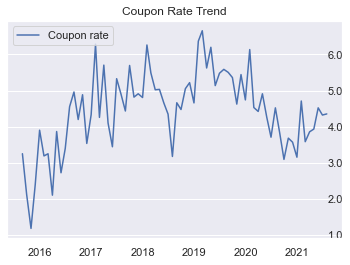

In [509]:
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import NullFormatter
ax = sns.lineplot(data=df_month.coupon)
ax.xaxis.grid(False)
ax.yaxis.tick_right()
# ax.yaxis.set_major_formatter(NullFormatter())
# ax.set_yticks([6.5,4.5,1.5])
ax.yaxis.set_label_position('right')
ax.set_title("Coupon Rate Trend")
ax.set_xlabel("")
ax.set_ylabel("")
ax.legend(['Coupon rate'],loc=2)
ax.tick_params(axis='y',right=False, pad=-20)
f = lambda x, pos: f'{x:,.1f}'
ax.yaxis.set_major_formatter(FuncFormatter(f))
# r = ax.set_yticklabels([])


In [510]:
tl = ax.yaxis.get_majorticklabels()
# r = ax.set_yticklabels([])
num = len(tl[1:-1])
i=0
gap = 0.98/(num)
for lb in tl[1:-1]:
    print(lb.get_text())
    ax.text(x=.99,y=i*gap+0.03,s=lb.get_text(),fontsize=12, alpha=0.75, ha='right', va='bottom', transform=ax.transAxes)
    i+=1
r = ax.set_yticklabels([])


1.0
2.0
3.0
4.0
5.0
6.0


In [505]:
tl[1:-1]

[Text(1, 1.0, ''),
 Text(1, 2.0, ''),
 Text(1, 3.0, ''),
 Text(1, 4.0, ''),
 Text(1, 5.0, ''),
 Text(1, 6.0, '')]

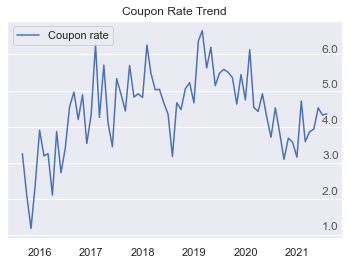

In [511]:
ax.figure

In [314]:
sns.axes_style()

{'axes.facecolor': '#EAEAF2',
 'axes.edgecolor': 'white',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': 'white',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': <CapStyle.round: 'round'>,
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

<AxesSubplot:xlabel='issdate', ylabel='amount'>

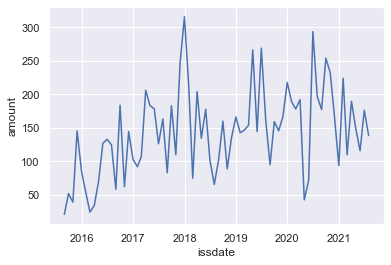

In [315]:
sns.lineplot(data=df_month.amount)

In [ ]:
sns.lineplot(data=df_month.grade_value)

In [85]:
# sns.set(style='ticks')
sns.set_style('darkgrid')

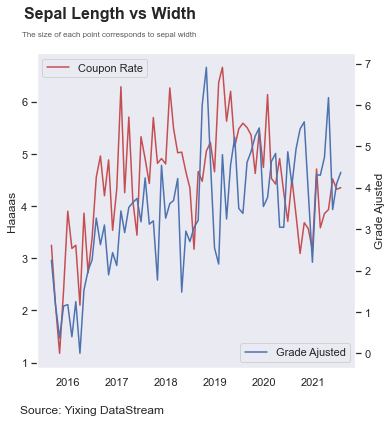

In [205]:
# manage figure level plot
fg1 = sns.relplot(data=df_month.coupon, kind='line',color="r")
ax1 = fg1.axes[0][0]
ax1.set_ylabel('Haaaas')
ax1.set_xlabel('')
ax1.xaxis.grid(False)
ax1.yaxis.grid(False)
ax2 = plt.twinx()
sns.lineplot(data=df_month.grade_value, color="b", ax=ax2)
ax2.yaxis.grid(False)
ax1.text(x=0.5, y=1.1, s='Sepal Length vs Width', fontsize=16, weight='bold', ha='right', va='bottom', transform=ax1.transAxes)
ax1.text(x=0.5, y=1.05, s='The size of each point corresponds to sepal width', fontsize=8, alpha=0.75, ha='right', va='bottom', transform=ax1.transAxes)
ax1.text(x=0.4, y=-0.15, s='Source: Yixing DataStream', fontsize=12, ha='right', va='bottom', transform=ax1.transAxes)
ax2.set_ylabel("Grade Ajusted")
ax1.legend(['Coupon Rate'], loc=2)
ax2.legend(['Grade Ajusted'], loc=4)


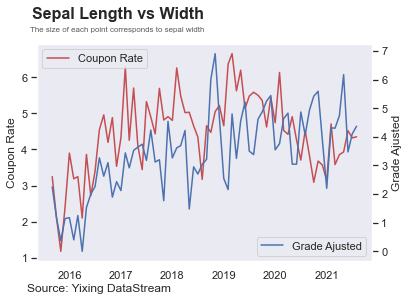

In [166]:
ax1 = sns.lineplot(data=df_month.coupon, color="r")
ax1.set_ylabel("Coupon Rate")
# ax1.set_xlabel("")
ax1.xaxis.grid(False)
ax1.yaxis.grid(False)
ax2 = plt.twinx()
sns.lineplot(data=df_month.grade_value, color="b", ax=ax2)
ax2.yaxis.grid(False)
ax1.text(x=0.5, y=1.1, s='Sepal Length vs Width', fontsize=16, weight='bold', ha='right', va='bottom', transform=ax1.transAxes)
ax1.text(x=0.5, y=1.05, s='The size of each point corresponds to sepal width', fontsize=8, alpha=0.75, ha='right', va='bottom', transform=ax1.transAxes)
ax1.text(x=0.4, y=-0.15, s='Source: Yixing DataStream', fontsize=12, ha='right', va='bottom', transform=ax1.transAxes)
ax2.set_ylabel("Grade Ajusted")
ax1.legend(['Coupon Rate'], loc=2)
ax2.legend(['Grade Ajusted'], loc=4)


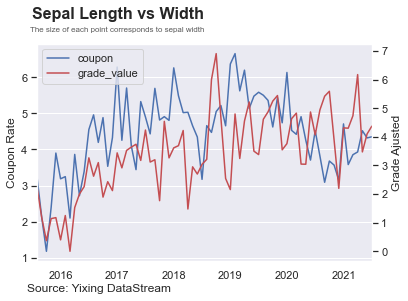

In [207]:
ax1= df_month.plot(y="coupon", legend=False)
ax2 = ax1.twinx()
df_month.plot(y="grade_value", ax=ax2, legend=False, color="r")

ax1.set_ylabel("Coupon Rate")
ax1.set_xlabel("")
ax1.xaxis.grid(False)
# ax1.yaxis.grid(False)
ax2.yaxis.grid(False)
ax1.text(x=0.5, y=1.1, s='Sepal Length vs Width', fontsize=16, weight='bold', ha='right', va='bottom', transform=ax1.transAxes)
ax1.text(x=0.5, y=1.05, s='The size of each point corresponds to sepal width', fontsize=8, alpha=0.75, ha='right', va='bottom', transform=ax1.transAxes)
ax1.text(x=0.4, y=-0.15, s='Source: Yixing DataStream', fontsize=12, ha='right', va='bottom', transform=ax1.transAxes)
ax2.set_ylabel("Grade Ajusted")

line1,label1 = ax1.get_legend_handles_labels()
line2,label2 = ax2.get_legend_handles_labels()
ax1.legend(line1+line2,label1+label2,loc=2)
plt.show()

In [174]:
label1

['coupon']

In [ ]:
sns.kdeplot(data=df_month,x='coupon',y='amount')

In [ ]:
df.groupby('province').agg({'coupon':'mean','amount':'sum','grade_value':'mean','code':'count'}).sort_values('coupon',ascending=False)

In [ ]:
df[df.bond_cn.str.contains('恒大')].describe()

In [ ]:
df_month.tail(20)

In [ ]:
df.sort_values('issdate').tail(20)